# Lab 6

In [20]:
import networkx as nx
from networkx.algorithms import node_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
G = nx.path_graph(4)
gpos = nx.spectral_layout(G)

G.edges()

EdgeView([(0, 1), (1, 2), (2, 3)])

In [22]:
G.nodes

NodeView((0, 1, 2, 3))

In [23]:
G.node[0]['label'] = 'blue'
G.node[3]['label'] = 'red'

node_color = [G.node[n]['label'] if 'label' in G.node[n] else 'black' for n in G.nodes]
node_color

['blue', 'black', 'black', 'red']

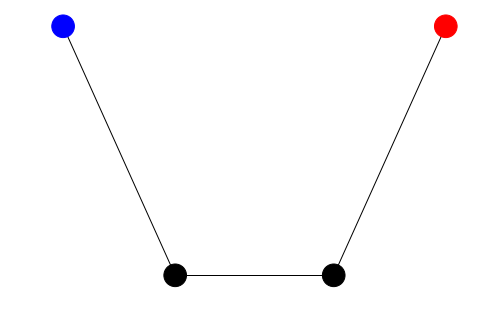

In [24]:
nx.draw(G, gpos, with_labels=False, node_size=512, node_color=node_color)

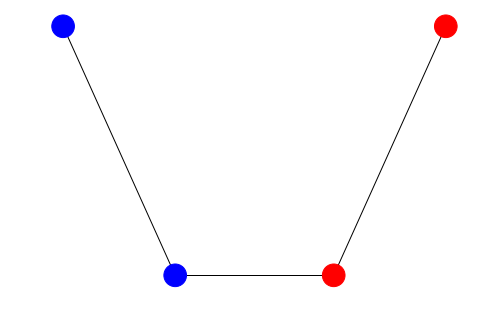

In [25]:
nx.draw(G,gpos, with_labels=False, node_size=512, node_color=node_classification.harmonic_function(G))

In [26]:
G = nx.karate_club_graph()

In [27]:
colored_clubs = ['red' if G.nodes[n]['club'] == 'Officer' else 'blue' for n in G.nodes]

In [28]:
gpos = nx.spring_layout(G, iterations=200)

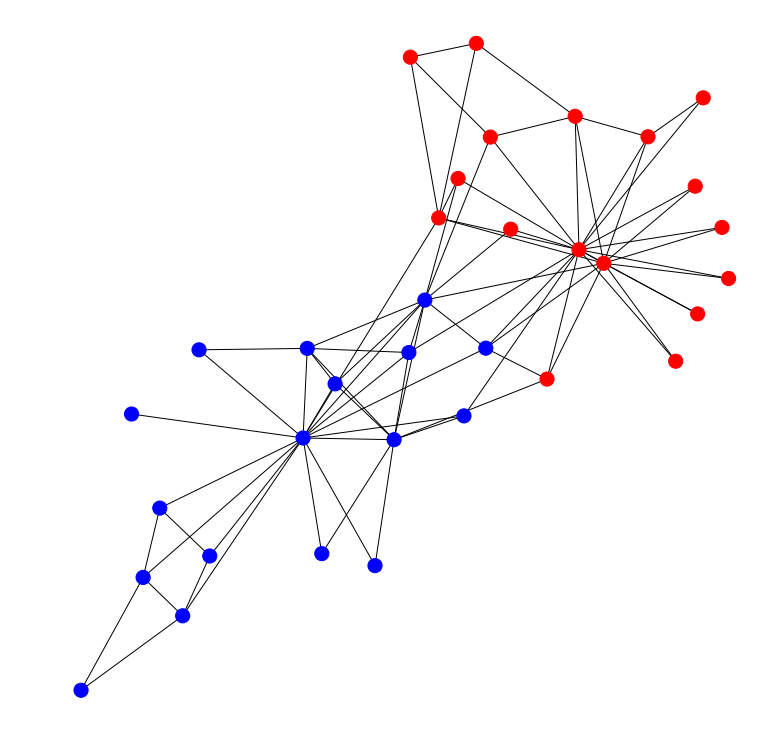

In [30]:
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=colored_clubs)
plt.show()

In [31]:
label_removed = set([0, 1, 2, 3, 4, 5, 6, 7])
for i in label_removed:
    del G.node[i]['club']

In [32]:
G.node[8]['club']

'Mr. Hi'

In [33]:
colored_clubs = [
    'red' if 'club' in G.node[n] and G.node[n]['club'] == 'Officer' 
    else 'blue' if 'club' in G.node[n] and G.node[n]['club'] == 'Mr. Hi' 
    else 'gray' for n in G.nodes
]

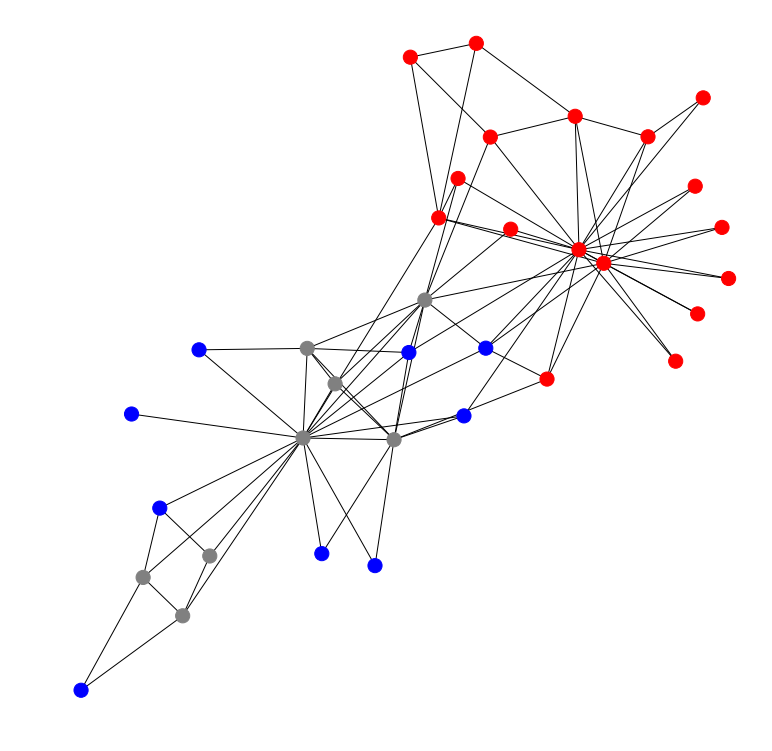

In [34]:
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=colored_clubs)
plt.show()

In [35]:
from nose.tools import *

predicted = node_classification.harmonic_function(G, label_name='club')
label_not_removed = set(list(range(len(G)))) - label_removed
for i in label_not_removed:
    print(predicted[i], G.node[i]['club'])
    assert_equal(predicted[i], G.node[i]['club'])

Mr. Hi Mr. Hi
Officer Officer
Mr. Hi Mr. Hi
Mr. Hi Mr. Hi
Mr. Hi Mr. Hi
Mr. Hi Mr. Hi
Officer Officer
Officer Officer
Mr. Hi Mr. Hi
Mr. Hi Mr. Hi
Officer Officer
Mr. Hi Mr. Hi
Officer Officer
Mr. Hi Mr. Hi
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer


# Graded Part


In [36]:
def create_toroidal(k):
    G=nx.Graph()
    count = 0
    mapping1 = {}
    mapping2 = {}
    for i in range(k):
        for j in range(k):
            mapping1[count] = (i,j)
            mapping2[(i,j)] = count
            G.add_node(count)
            count +=1
    for i in range(k):
        for j in range(k):
            if (i,j+1) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i,j+1])
            if (i,j-1) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i,j-1])
            if (i+1,j) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i+1,j])
            if (i-1,j) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i-1,j])  
    j = 0
    for i in range(k):
        G.add_edge(mapping2[(i,j)],mapping2[i,j+k-1])
    i = 0
    for j in range(k):
        G.add_edge(mapping2[(i,j)],mapping2[i+k-1,j])
    return G

In [37]:
G = create_toroidal(16)  
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [39]:
G.node[0]['label'] = 'blue'
G.node[255]['label'] = 'red'
gpos = nx.spring_layout(G, iterations=200)
node_color=['blue' if n == 0 else 'red' if n == 255 else 'gray' for n in G.nodes]

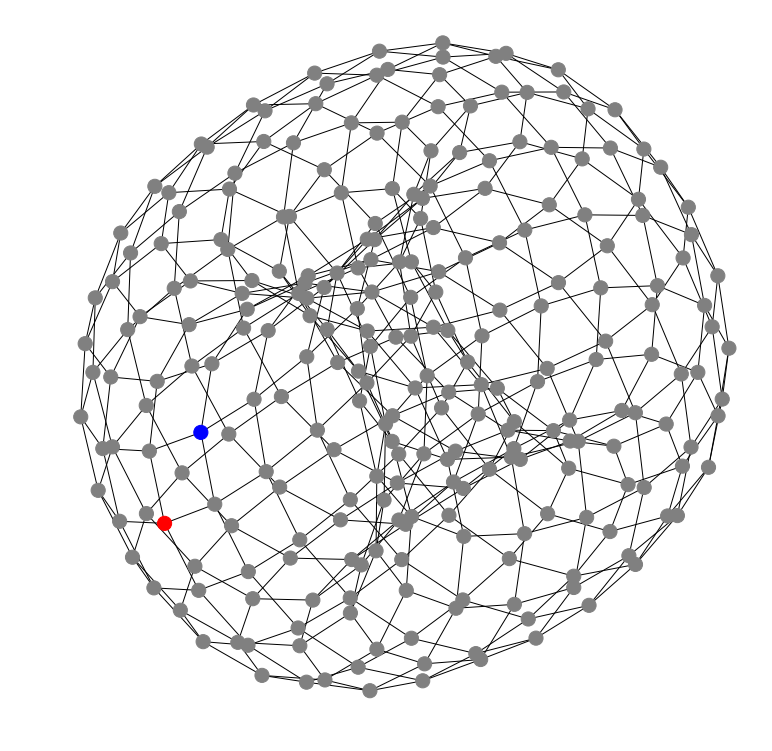

In [40]:
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=node_color)
plt.show()

In [41]:
node_color=node_classification.harmonic_function(G)

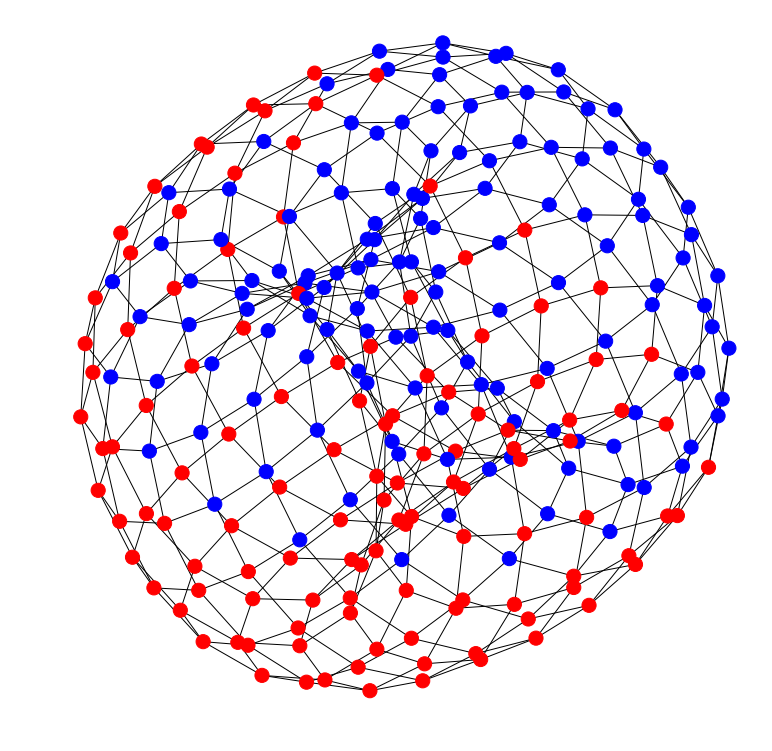

In [42]:
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=node_color)
plt.show()

In [43]:
print(node_color)

['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 're

In [44]:
removed = [n for n in G.nodes if n%3 == 0 ]
for n in G.nodes:
    if n not in removed:
        G.node[n]['label'] = node_color[n]

In [45]:
print(G.node[1])
print(G.node[2])
print(G.node[3])
print(G.node[4])
print(G.node[252])
print(G.node[253])
print(G.node[254])
print(G.node[255])

{'label': 'blue'}
{'label': 'blue'}
{}
{'label': 'blue'}
{}
{'label': 'red'}
{'label': 'red'}
{'label': 'red'}


In [46]:
predicted = node_classification.harmonic_function(G, label_name='label')

In [47]:
print(predicted)

['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'r

In [48]:
for i in range(len(node_color)):
    print(predicted[i], node_color[i])
    assert_equal(predicted[i], node_color[i])

blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
red red
red red
red red
red red
red red
red red
red red
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue red


AssertionError: 'blue' != 'red'
- blue
+ red


In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [51]:
confusion_matrix(node_color, predicted)

array([[136,   0],
       [  2, 118]])

In [52]:
precision_recall_fscore_support(node_color, predicted)

(array([0.98550725, 1.        ]),
 array([1.        , 0.98333333]),
 array([0.99270073, 0.99159664]),
 array([136, 120]))

# Harmonic function implementation

In [62]:
np.set_printoptions(threshold=np.nan)

def extract_labels(Graph, label_name):
    result = []
    unlabeled = []
    label_to_id = {}
    lid = 0
    for i, node in enumerate(Graph.nodes(data=True)):
        if label_name in node[1]:
            label = node[1][label_name]
            if label not in label_to_id:
                label_to_id[label] = lid
                lid += 1
            result.append((i, label_to_id[label]))
        else:
            unlabeled.append(i)
            
    result = np.array(result)
    unlabeled = np.array(unlabeled)
    label_map = np.zeros(lid, dtype=object)
    for l, i in sorted(label_to_id.items(), key=lambda x:x[1]):
        label_map[i] = l
    return result, unlabeled, label_map
    
    
def your_harmonic_function(Graph, label_name):
    from scipy import sparse
    W = nx.to_scipy_sparse_matrix(Graph)    
    labels, unlabeled_indx, label_map = extract_labels(Graph, label_name)

    num_samples = W.shape[0]
    num_classes = label_map.shape[0]
    
    labeled_indx = labels[:, 0]
    
    F = np.zeros((num_samples, num_classes))
    F[labels[:, 0], labels[:, 1]] = 1
    F_l = F[labeled_indx]
    
    d = W.sum(axis=0).A[0]
    d[d==0] = 1
    D_inv = sparse.diags((1/d), format='csc')
    
    P = D_inv.dot(W)
    
    P_uu = P[unlabeled_indx][:, unlabeled_indx]
    P_ul = P[unlabeled_indx][:, labeled_indx]
    I = sparse.identity(P_uu.shape[0])
    
    F[unlabeled_indx] = sparse.linalg.inv(I - P_uu).dot(P_ul).dot(F_l) 
    
    labeled_ids = F.argmax(axis=1)
    labeled_list = label_map[labeled_ids]
    
    return labeled_list


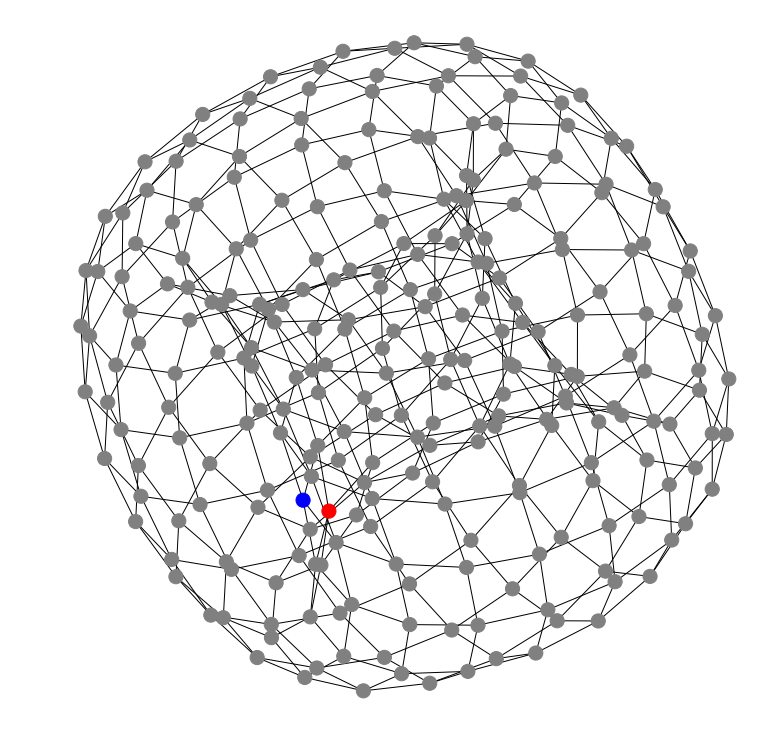

In [63]:
G = create_toroidal(16)  
G.node[0]['label'] = 'blue'
G.node[255]['label'] = 'red'
gpos = nx.spring_layout(G, iterations=200)
node_color=['blue' if n == 0 else 'red' if n == 255 else 'gray' for n in G.nodes]
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=node_color)
plt.show()

In [64]:
node_color=node_classification.harmonic_function(G)
removed = [n for n in G.nodes if n%3 == 0 ]
for n in G.nodes:
    if n not in removed:
        G.node[n]['label'] = node_color[n]
predicted = your_harmonic_function(G, label_name='label')

confusion_matrix(node_color, predicted)

array([[136,   0],
       [  2, 118]])

In [61]:
precision_recall_fscore_support(node_color, predicted)

(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([138, 118]))